# CLUSTERMAP
- Matrix plot
- Heatmap and clusterings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
toy_data_dict = {
    'Name': ['Andy', 'Ben', 'Claire', 'David'],
    'Hours_Studied': [10, 20, 12, 28],
    'Score': [15, 20, 16, 25],
    'Street_Address': [11, 24, 18, 9]
}

toy_data = pd.DataFrame(toy_data_dict)
toy_data.set_index('Name', inplace=True)

toy_data

,Hours_Studied,Score,Street_Address
Name,,,
Andy,10,15,11
Ben,20,20,24
Claire,12,16,18
David,28,25,9


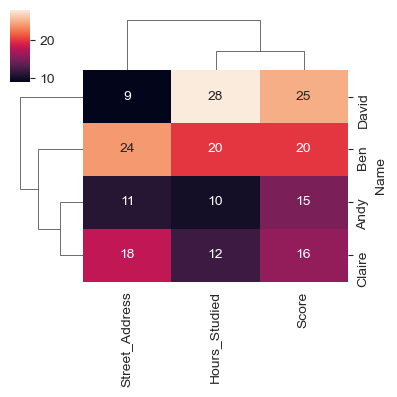

In [4]:
sns.clustermap(data=toy_data, figsize=(4,4), annot=True);

### The protrusions to the top and left of the heatmap are called dendograms. They are how sns has clustered our data. They show how close the column and row vectors are to each other. Hence the reordering of rows and cols.
- To produce the dendograms sns uses Hierarchical Agglomerative Clustering
- The idea is to one by one form clusters with the closest elements and then keep growing the cluster till there is only 1 left
- The order of merging forms the dendograms
- The larger the height of the dendograms, the more the distance b/w the points